# Mounting the google drive

In [1]:
# Mounting the google drive to get the images

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing useful libraries and data reading

In [3]:
# Importing useful libraries

import numpy as np # For numerical computations
import pandas as pd # For dataframe related tasks

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To remove unneccesary warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression # For model training
from sklearn.model_selection import train_test_split # Fro train test splitting
from sklearn import metrics # For model evaluation

import pickle # For model saving

In [4]:
# Specifying the location for all our data is located

data_folder_path = 'drive/MyDrive/AI_project_data/'

In [17]:
# Reading the data

df = pd.read_csv(data_folder_path + 'titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data cleaning and visualization

In [7]:
# Lets see the shape of our data

df.shape

(891, 12)

In [8]:
# Lets see which are numerical columns and which are not

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# Lets see how many missing values we have in our dataset

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above we have three columns containing missing values but when we see the Cabin it has a lot so we can drop that whole column

In [18]:
# Lets drop the Cabin column and fill the null values of Age by mean
# And fill the Embarked column missing values by mode

df = df.drop(columns='Cabin',axis=1)
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [19]:
# Lets check if all the null values are fixed

df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
# Lets check the skewness of the dataset over our target 

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

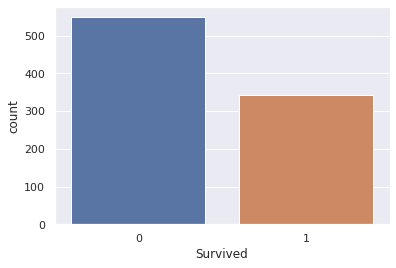

In [22]:
# Lets try to visualize the above result

sns.set()
sns.countplot(data=df,x='Survived')
plt.show()

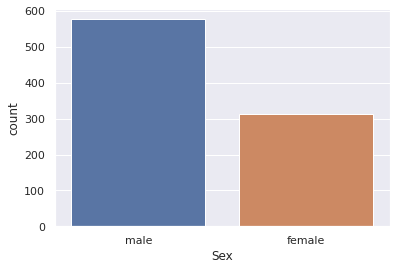

In [23]:
# Lets try to visualize the sex column

sns.countplot(data=df,x='Sex')
plt.show()

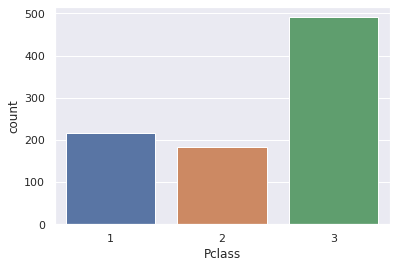

In [25]:
# Lets try to visualize the Pclass column

sns.countplot(data=df,x='Pclass')
plt.show()

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

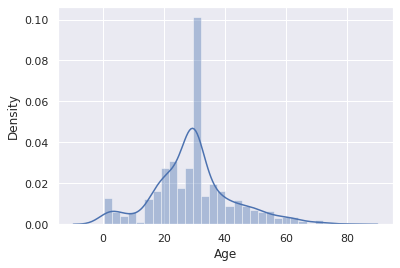

In [26]:
# Lets try to visualize the age column

sns.distplot(df['Age'])
plt.show()

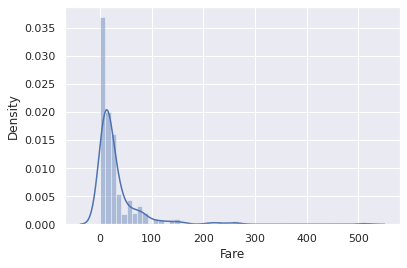

In [36]:
# Lets try to visualize the Fare column

sns.distplot(df['Fare'])
plt.show()

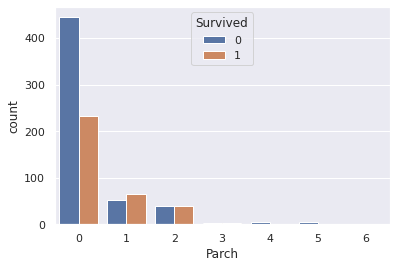

In [39]:
# Lets try to visualize the Parch survival rates

sns.countplot(data=df,x='Parch',hue='Survived')
plt.show()

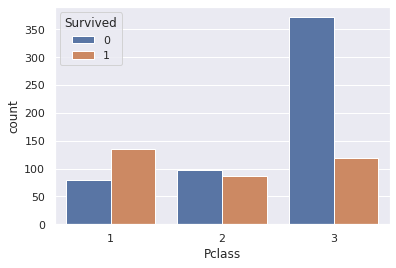

In [31]:
# Lets try to visualize the Pclass survival rates

sns.countplot(data=df,x='Pclass',hue='Survived')
plt.show()

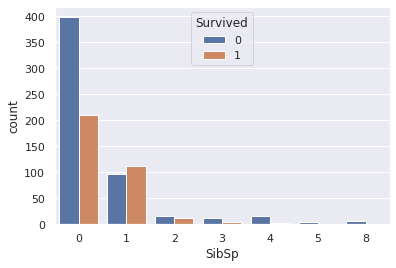

In [44]:
# Lets try to visualize the Sibsp survival rates

sns.countplot(data=df,x='SibSp',hue='Survived')
plt.show()

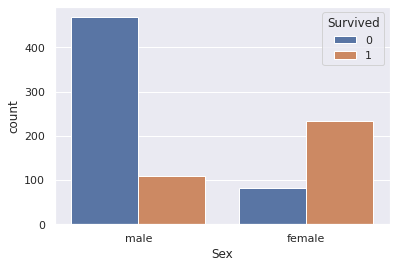

In [32]:
# Lets try to visualize the gender survival rates

sns.countplot(data=df,x='Sex',hue='Survived')
plt.show()

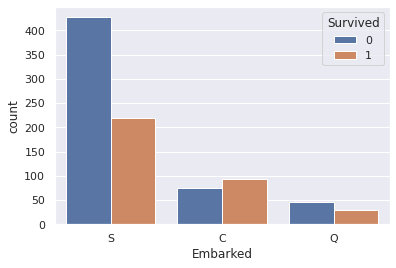

In [47]:
# Lets try to visualize the Embarked survival rates

sns.countplot(data=df,x='Embarked',hue='Survived')
plt.show()

# Data preprocessing

In [34]:
# Lets remove some columns since we don't need them in the model training

remove_cols = ['PassengerId','Ticket','Name']

df = df.drop(columns=remove_cols,axis=1)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [45]:
# Lets see which columns are non-numerical

categorical_cols = []
for column in list(df.columns):
  if df[column].dtype == 'O':
    categorical_cols.append(column)
categorical_cols

['Sex', 'Embarked']

In [48]:
# Encoding to change all the categorical columns into numerical

for col in categorical_cols:
  categories = list(df[col].value_counts().index)
  for i,category in enumerate(categories):
    df[col] = df[col].apply(lambda x:i if x == category else x)

In [49]:
# Lets check if all the categorical columns are changed

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [50]:
# Now let take our target and features

X = df.drop(columns='Survived',axis=1)
y = df['Survived']

In [52]:
# After we get our target and features let us do the train test splition

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=1
                                                 )

# Model training

In [54]:
# Instatiating the logistic regression model

lr = LogisticRegression()

In [55]:
# Training our model

lr.fit(X_train,y_train)

LogisticRegression()

# Model evaluation

In [58]:
# Lets see the training set accuracy

pred = lr.predict(X_train)
r2_score = metrics.accuracy_score(y_train,pred)
r2_score

0.8019662921348315

In [59]:
# Lets see the test set accuracy

pred = lr.predict(X_test)
r2_score = metrics.accuracy_score(y_test,pred)
r2_score

0.8044692737430168

# Saving the model

In [61]:
# Saving the model 

file_name = 'models/titanic_survival.h5'
with open(file_name,'wb') as f:
  pickle.dump(lr,f)